데이터 로드 분류

In [1]:
import pandas as pd
df=pd.read_csv('data3.csv',encoding='latin1')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


데이터 시각화 (데이터 분석)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

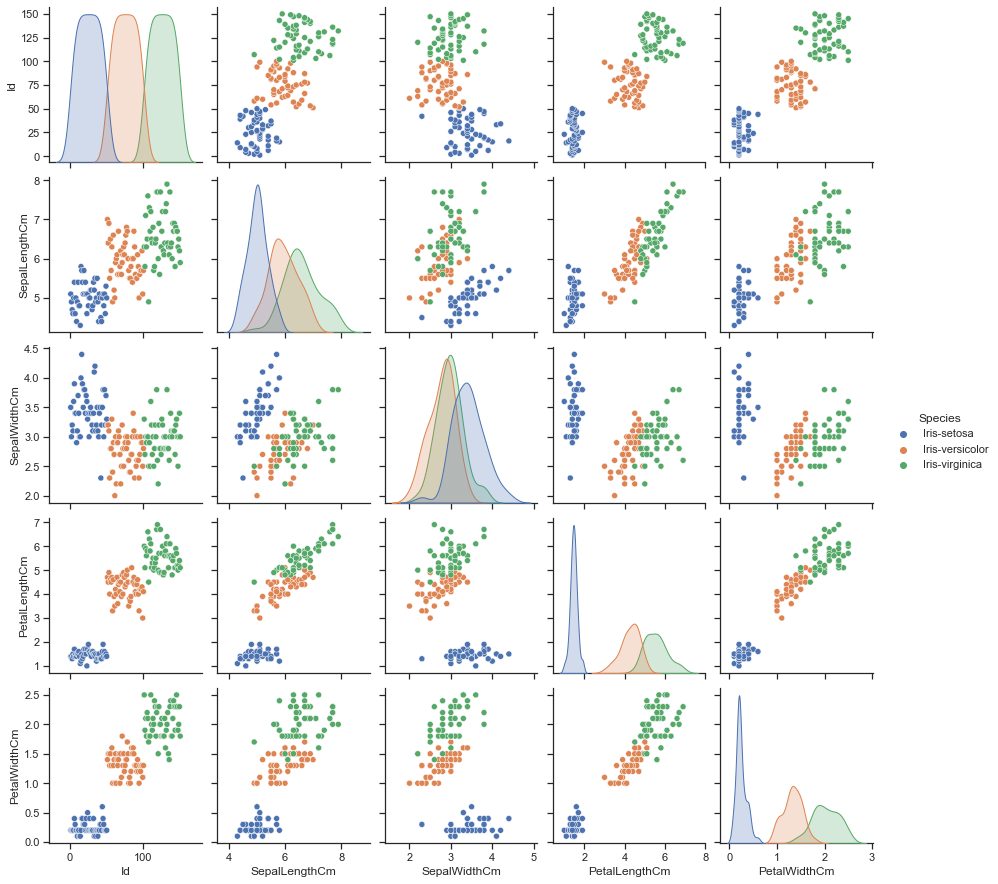

In [3]:
sns.set(style='ticks',color_codes=True)
g=sns.pairplot(df,hue='Species')

데이터 정리

In [4]:
import numpy as np
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
X_data=df[['SepalLengthCm','PetalLengthCm','PetalWidthCm']].values

Y_data=df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
                             ,[0,1,2])
Y_data=Y_data.values
Y_data#정수 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [6]:
from tensorflow.keras.utils import to_categorical#입력 data가 반드시 정수일때 만사용

In [7]:
Y_data=to_categorical(Y_data)
Y_data

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

데이터 전처리

In [8]:
from sklearn.model_selection import train_test_split
t_x,tt_x,t_y,tt_y=train_test_split(X_data,Y_data,random_state=1)

모델 생성 및 학습

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
m=Sequential()
m.add(Dense(3, input_dim=3,activation='softmax'))
m.compile(optimizer='adam',loss='categorical_crossentropy'
          ,metrics=['accuracy'])
hy=m.fit(t_x,t_y,epochs=200,batch_size=1,validation_data=(tt_x,tt_y))

Epoch 1/200
112/112 [==============================] - 0s 1ms/step - loss: 4.2294 - accuracy: 0.3304 - val_loss: 3.8314 - val_accuracy: 0.3421
Epoch 2/200
112/112 [==============================] - 0s 575us/step - loss: 3.1045 - accuracy: 0.3036 - val_loss: 2.8703 - val_accuracy: 0.1579
Epoch 3/200
112/112 [==============================] - 0s 596us/step - loss: 2.2756 - accuracy: 0.0179 - val_loss: 2.2480 - val_accuracy: 0.0000e+00
Epoch 4/200
112/112 [==============================] - 0s 648us/step - loss: 1.7960 - accuracy: 0.0000e+00 - val_loss: 1.8873 - val_accuracy: 0.0000e+00
Epoch 5/200
112/112 [==============================] - 0s 587us/step - loss: 1.5430 - accuracy: 0.0982 - val_loss: 1.6411 - val_accuracy: 0.2105
Epoch 6/200
112/112 [==============================] - 0s 595us/step - loss: 1.4006 - accuracy: 0.3393 - val_loss: 1.5019 - val_accuracy: 0.2368
Epoch 7/200
112/112 [==============================] - 0s 561us/step - loss: 1.3221 - accuracy: 0.3661 - val_loss: 1.423

112/112 [==============================] - 0s 572us/step - loss: 0.4877 - accuracy: 0.8304 - val_loss: 0.5424 - val_accuracy: 0.6842
Epoch 58/200
112/112 [==============================] - 0s 726us/step - loss: 0.4835 - accuracy: 0.8214 - val_loss: 0.5374 - val_accuracy: 0.6842
Epoch 59/200
112/112 [==============================] - 0s 575us/step - loss: 0.4810 - accuracy: 0.8125 - val_loss: 0.5321 - val_accuracy: 0.6842
Epoch 60/200
112/112 [==============================] - 0s 584us/step - loss: 0.4722 - accuracy: 0.8036 - val_loss: 0.5254 - val_accuracy: 0.6842
Epoch 61/200
112/112 [==============================] - 0s 540us/step - loss: 0.4670 - accuracy: 0.7946 - val_loss: 0.5146 - val_accuracy: 0.7632
Epoch 62/200
112/112 [==============================] - 0s 669us/step - loss: 0.4642 - accuracy: 0.8661 - val_loss: 0.5195 - val_accuracy: 0.6842
Epoch 63/200
112/112 [==============================] - 0s 561us/step - loss: 0.4607 - accuracy: 0.8036 - val_loss: 0.5005 - val_accuracy

112/112 [==============================] - 0s 846us/step - loss: 0.3177 - accuracy: 0.9464 - val_loss: 0.3682 - val_accuracy: 0.8684
Epoch 114/200
112/112 [==============================] - 0s 581us/step - loss: 0.3147 - accuracy: 0.9464 - val_loss: 0.3600 - val_accuracy: 0.9211
Epoch 115/200
112/112 [==============================] - 0s 621us/step - loss: 0.3145 - accuracy: 0.9554 - val_loss: 0.3569 - val_accuracy: 0.9211
Epoch 116/200
112/112 [==============================] - 0s 565us/step - loss: 0.3130 - accuracy: 0.9732 - val_loss: 0.3574 - val_accuracy: 0.9211
Epoch 117/200
112/112 [==============================] - 0s 584us/step - loss: 0.3116 - accuracy: 0.9375 - val_loss: 0.3600 - val_accuracy: 0.8684
Epoch 118/200
112/112 [==============================] - 0s 549us/step - loss: 0.3090 - accuracy: 0.9554 - val_loss: 0.3511 - val_accuracy: 0.9211
Epoch 119/200
112/112 [==============================] - 0s 587us/step - loss: 0.3066 - accuracy: 0.9554 - val_loss: 0.3459 - val_ac

Epoch 169/200
112/112 [==============================] - 0s 555us/step - loss: 0.2383 - accuracy: 0.9732 - val_loss: 0.2841 - val_accuracy: 0.9474
Epoch 170/200
112/112 [==============================] - 0s 605us/step - loss: 0.2373 - accuracy: 0.9643 - val_loss: 0.2840 - val_accuracy: 0.9211
Epoch 171/200
112/112 [==============================] - 0s 584us/step - loss: 0.2375 - accuracy: 0.9732 - val_loss: 0.2845 - val_accuracy: 0.9211
Epoch 172/200
112/112 [==============================] - 0s 575us/step - loss: 0.2353 - accuracy: 0.9821 - val_loss: 0.2819 - val_accuracy: 0.9474
Epoch 173/200
112/112 [==============================] - 0s 657us/step - loss: 0.2342 - accuracy: 0.9821 - val_loss: 0.2758 - val_accuracy: 0.9474
Epoch 174/200
112/112 [==============================] - 0s 611us/step - loss: 0.2346 - accuracy: 0.9643 - val_loss: 0.2806 - val_accuracy: 0.9211
Epoch 175/200
112/112 [==============================] - 0s 625us/step - loss: 0.2317 - accuracy: 0.9821 - val_loss: 0

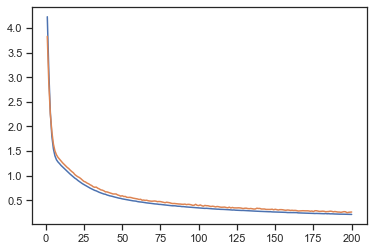

In [12]:
ec=range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])

MLP다중 퍼셉트론

In [ ]:
m=Sequential()
m.add(Dense(3, input_dim=3,activation=''sigmoid''))
m.add(Dense(3,activation='softmax'))
m.compile(optimizer='adam',loss='categorical_crossentropy'
          ,metrics=['accuracy'])
hy=m.fit(t_x,t_y,epochs=200,batch_size=1,validation_data=(tt_x,tt_y))